# Credit Default Prediction
This project predicts the probability of default for credit card clients using logistic regression. The dataset is from UCI and contains demographic, payment history, and billing information.

## 1. Load Libraries and Data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("UCI_Credit_Card.csv")
df.columns = df.columns.str.strip()
df = df.rename(columns={'default.payment.next.month': 'default'})

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 2. Dataset Overview

In [57]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Target distribution:\n", df['default'].value_counts(normalize=True))

Dataset shape: (30000, 25)
Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']
Target distribution:
 default
0    0.7788
1    0.2212
Name: proportion, dtype: float64


## 3. Exploratory Data Analysis

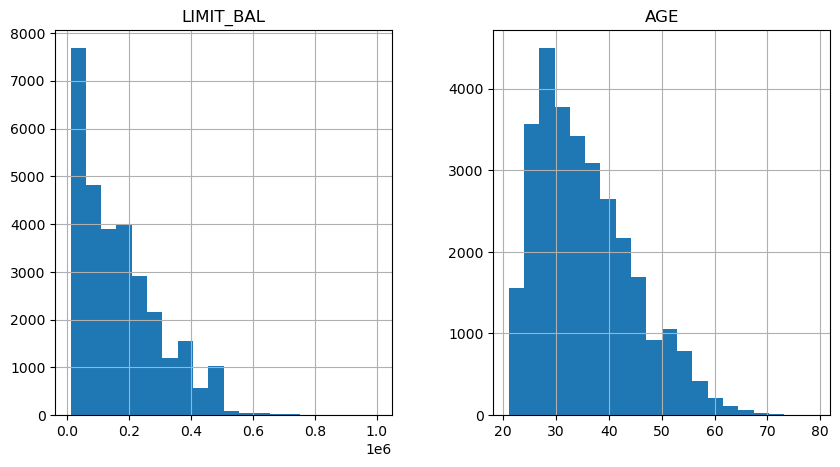

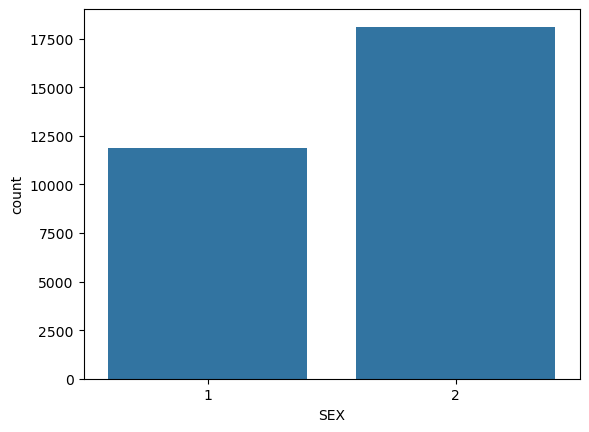

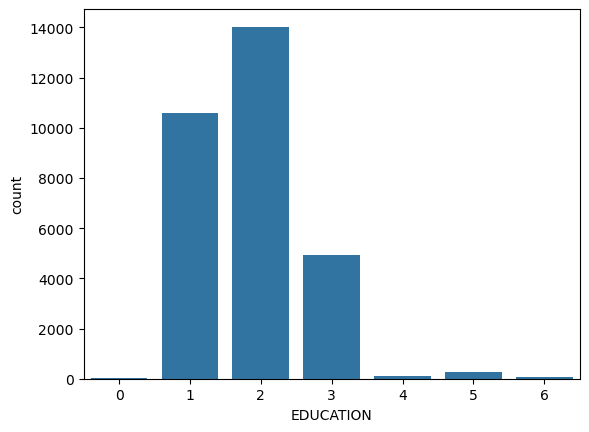

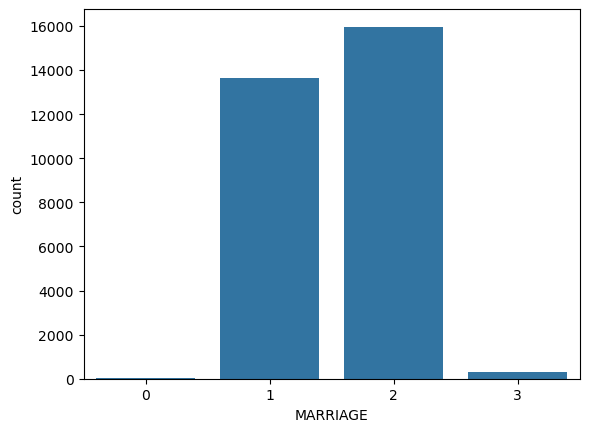

In [58]:
# Histograms for numeric features
numeric_features = ['LIMIT_BAL', 'AGE']
df[numeric_features].hist(bins=20, figsize=(10,5))
plt.show()

# Countplots for categorical features
sns.countplot(x='SEX', data=df)
plt.show()
sns.countplot(x='EDUCATION', data=df)
plt.show()
sns.countplot(x='MARRIAGE', data=df)
plt.show()

## 4. Preprocessing

In [59]:
demographic_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
payment_history_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_amount_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
payment_amount_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

features = demographic_features + payment_history_features + bill_amount_features + payment_amount_features
target = 'default'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Logistic Regression Model

In [60]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Beta coefficients
coeff_df = pd.DataFrame({'Feature': features, 'Beta': logreg.coef_[0]})
coeff_df = coeff_df.sort_values(by='Beta', key=abs, ascending=False)
coeff_df

,Feature,Beta
5,PAY_0,0.649275
11,BILL_AMT1,-0.314089
18,PAY_AMT2,-0.217767
17,PAY_AMT1,-0.181461
0,LIMIT_BAL,-0.123535
13,BILL_AMT3,0.105859
6,PAY_2,0.101663
2,EDUCATION,-0.097757
7,PAY_3,0.097457
3,MARRIAGE,-0.072217


## 6. Evaluation

ROC AUC: 0.716


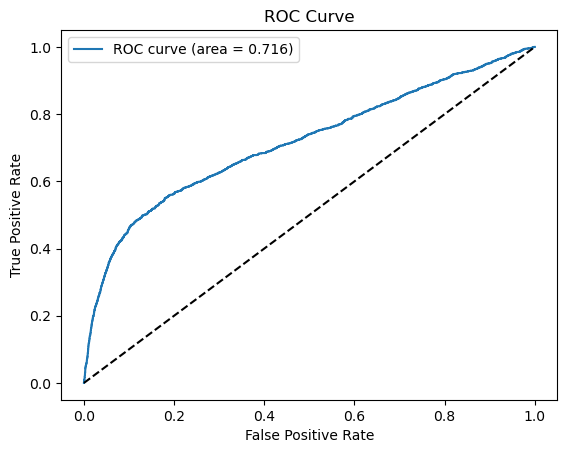

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.70      0.24      0.36      1659

    accuracy                           0.81      7500
   macro avg       0.76      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500



In [61]:
# Predict probabilities
y_pred_prob = logreg.predict_proba(X_test_scaled)[:,1]
y_pred = logreg.predict(X_test_scaled)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", round(auc,3))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix
print(classification_report(y_test, y_pred))

## 7. Insights
- The coefficients above indicate which features increase or decrease the probability of default.
- Features with larger absolute beta values have stronger influence.
- This model can now be used to build a simple interface to input feature values and get predicted probability of default.
- This can be generalized into a simple function that determines the probability of defaulting given the parameters.

In [62]:
def predict_default(input_dict):
    input_df = pd.DataFrame([input_dict])
    input_scaled = scaler.transform(input_df)
    prob = logreg.predict_proba(input_scaled)[0][1]
    return f"{prob * 100:.2f}%"


## 8. Sample Parameter Testing

In [63]:
sample_input = {
    'LIMIT_BAL': 200000,
    'SEX': 2,
    'EDUCATION': 2,
    'MARRIAGE': 1,
    'AGE': 30,
    'PAY_0': 0, 'PAY_2': 0, 'PAY_3': 0, 'PAY_4': 0, 'PAY_5': 0, 'PAY_6': 0,
    'BILL_AMT1': 50000, 'BILL_AMT2': 45000, 'BILL_AMT3': 47000,
    'BILL_AMT4': 46000, 'BILL_AMT5': 48000, 'BILL_AMT6': 45000,
    'PAY_AMT1': 20000, 'PAY_AMT2': 18000, 'PAY_AMT3': 20000,
    'PAY_AMT4': 19000, 'PAY_AMT5': 21000, 'PAY_AMT6': 18000
}

predict_default(sample_input)


'13.40%'

In [64]:
import streamlit as st
import pandas as pd

st.title("Credit Default Probability Predictor")

# Input fields
LIMIT_BAL = st.number_input("Credit Limit", value=200000)
SEX = st.selectbox("Sex", [1, 2])
EDUCATION = st.selectbox("Education", [1, 2, 3, 4])
MARRIAGE = st.selectbox("Marriage", [1, 2, 3])
AGE = st.number_input("Age", value=30)
PAY_0 = st.number_input("Repayment status Sep", value=0)
# ...add other PAY, BILL_AMT, PAY_AMT fields similarly

# Collect input into a dict
input_dict = {
    'LIMIT_BAL': LIMIT_BAL,
    'SEX': SEX,
    'EDUCATION': EDUCATION,
    'MARRIAGE': MARRIAGE,
    'AGE': AGE,
    'PAY_0': PAY_0,
    # add the rest here...
}

if st.button("Predict"):
    prob = predict_default(input_dict)
    st.write(f"Probability of default: {prob}")

2025-12-26 18:47:58.068 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 18:47:58.202 
  command:

    streamlit run /opt/anaconda3/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-12-26 18:47:58.202 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 18:47:58.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 18:47:58.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 18:47:58.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 18:47:58.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 18:47:58.204 Session state does not